### Importing libraries

In [ ]:
import requests
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.linear_model import LinearRegression

In [ ]:
pd.set_option('display.max_columns', None)

# Data Loading

In [ ]:
!gdown 1dM92pQl_KcBytpv2yA2xBnpR88q6imdU

In [ ]:
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
df_rumah123_1 = pd.read_csv('/content/rumah123-01.csv')

In [ ]:
df_rumah123_1.head(3)

,web-scraper-order,web-scraper-start-url,name,location,bedroom,bathroom,garage,land_area,building_area,price
0,1716899274-1,https://www.rumah123.com/jual/jakarta-pusat/ru...,Rumah Dijual Di Menteng Teuku Umar Cocok Untu...,"Menteng, Jakarta Pusat",8.0,8.0,10.0,2600 m²,1500 m²,Rp 350 Miliar
1,1716899274-2,https://www.rumah123.com/jual/jakarta-pusat/ru...,"Rumah Full Furnished, Renov Dan Layak Huni di ...","Roxy, Jakarta Pusat",5.0,3.0,1.0,129 m²,280 m²,"Rp 3,5 Miliar"
2,1716899274-3,https://www.rumah123.com/jual/jakarta-pusat/ru...,"Rumah Menteng Hoek Murah Cilosari, LT 716m2, L...","Menteng, Jakarta Pusat",5.0,3.0,3.0,716 m²,300 m²,"Rp 22,5 Miliar"


In [ ]:
df_rumah123_2 = pd.read_csv('/content/rumah123-02.csv')

In [ ]:
df_rumah123_2.head(3)

,web-scraper-order,web-scraper-start-url,name,location,bedroom,bathroom,garage,land_area,building_area,price
0,1716907203-1,https://www.rumah123.com/jual/jakarta-pusat/ru...,2 UNIT RUMAH DAN 1 RUKO SANGAT CANTIK DAN SIAP...,"Cideng, Jakarta Pusat",9.0,10.0,NaN,480 m²,400 m²,Rp 25 Miliar
1,1716907203-2,https://www.rumah123.com/jual/jakarta-pusat/ru...,"Prime area Menteng, rumah 2 Lantai + Baswment ...","Menteng, Jakarta Pusat",12.0,10.0,2.0,870 m²,1400 m²,Rp 65 Miliar
2,1716907203-3,https://www.rumah123.com/jual/jakarta-pusat/ru...,House For Sale Menteng Prime Area Jakarta Pusat,"Menteng, Jakarta Pusat",4.0,4.0,NaN,450 m²,400 m²,Rp 30 Miliar


In [ ]:
df_brighton = pd.read_csv('/content/brighton.csv')

In [ ]:
df_brighton.head(3)

,web-scraper-order,web-scraper-start-url,name,location,bedroom,bathroom,land_area,building_area,price
0,1716939237-1,https://www.brighton.co.id/dijual/?Keyword=JAK...,Ruko bagus siap pakai Petojo Utara Jakarta Pusat,"Petojo, Jakarta Pusat",NaN,3,48m2,144m2,"Rp 1,9 Miliar"
1,1716939240-2,https://www.brighton.co.id/dijual/?Keyword=JAK...,RUMAH KOST DI SALEMBA JAKARTA PUSAT,"Salemba, Jakarta Pusat",21,21,250m2,300m2,Rp 11 Miliar
2,1716939240-3,https://www.brighton.co.id/dijual/?Keyword=JAK...,RUMAH SIAP HUNI DI MENTENG JAKARTA PUSAT,"Menteng, Jakarta Pusat",3+1,3+1,149m2,271m2,Rp 8 Miliar


In [ ]:
df_99co = pd.read_csv('/content/99co.csv')

In [ ]:
df_99co.head(3)

,web-scraper-order,web-scraper-start-url,name,location,bedroom,bathroom,land_area,building_area,price
0,1716935796-1,https://www.99.co/id/jual/rumah/jakarta-pusat?...,Rumah Bagus Di Sindanglaya Menteng Jakarta Pusat,"Menteng, Jakarta Pusat",12,4,LT947 m²,LB250 m²,Rp35 Miliar
1,1716935796-2,https://www.99.co/id/jual/rumah/jakarta-pusat?...,"Tumah tua jln Gereja ayam, Jakarta pusat","Sawah Besar, Jakarta Pusat",0,0,LT487 m²,LB248 m²,Rp20 Miliar
2,1716935796-3,https://www.99.co/id/jual/rumah/jakarta-pusat?...,Rumah Murah Hitung Tanah di Cempaka Putih Jaka...,"Cempaka Putih, Jakarta Pusat",5,2,LT209 m²,LB150 m²,"Rp4,59 Miliar"


In [ ]:
df_rumah123_joined = pd.concat([df_rumah123_1, df_rumah123_2])

In [ ]:
print(f"Jumlah data rumah123: {df_rumah123_joined.shape}")
print(f"Jumlah data 99co: {df_99co.shape}")
print(f"Jumlah data brighton: {df_brighton.shape}")

Jumlah data rumah123: (20700, 10)
Jumlah data 99co: (9900, 9)
Jumlah data brighton: (1489, 9)


# EDA

## Rumah123

### Assessing Data

In [ ]:
df_rumah123_joined = df_rumah123_joined.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'name', 'garage'])

In [ ]:
df_rumah123_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20700 entries, 0 to 16159
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       20700 non-null  object 
 1   bedroom        19142 non-null  float64
 2   bathroom       18872 non-null  float64
 3   land_area      20613 non-null  object 
 4   building_area  19059 non-null  object 
 5   price          20700 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


### Data Cleaning

#### 1. Missing Values

In [ ]:
df_rumah123_joined.isna().sum()

location            0
bedroom          1558
bathroom         1828
land_area          87
building_area    1641
price               0
dtype: int64

In [ ]:
df_rumah123_joined.dropna(inplace=True)

In [ ]:
df_rumah123_joined.isna().sum()

location         0
bedroom          0
bathroom         0
land_area        0
building_area    0
price            0
dtype: int64

#### 2. Fixing values

In [ ]:
df_rumah123_joined.head(5)

,location,bedroom,bathroom,land_area,building_area,price
0,"Menteng, Jakarta Pusat",8.0,8.0,2600 m²,1500 m²,Rp 350 Miliar
1,"Roxy, Jakarta Pusat",5.0,3.0,129 m²,280 m²,"Rp 3,5 Miliar"
2,"Menteng, Jakarta Pusat",5.0,3.0,716 m²,300 m²,"Rp 22,5 Miliar"
3,"Menteng, Jakarta Pusat",10.0,10.0,2629 m²,1724 m²,Rp 325 Miliar
4,"Cempaka Putih, Jakarta Pusat",5.0,5.0,800 m²,468 m²,Rp 15 Miliar


In [ ]:
df_rumah123_joined.tail(5)

,location,bedroom,bathroom,land_area,building_area,price
16155,"Menteng, Jakarta Pusat",7.0,3.0,728 m²,380 m²,Rp 56 Miliar
16156,"Menteng, Jakarta Pusat",3.0,3.0,753 m²,520 m²,Rp 48 Miliar
16157,"Cempaka Putih, Jakarta Pusat",3.0,1.0,89 m²,45 m²,"Rp 1,8 Miliar"
16158,"Menteng, Jakarta Pusat",5.0,3.0,780 m²,500 m²,Rp 53 Miliar
16159,"Menteng, Jakarta Pusat",3.0,2.0,360 m²,200 m²,Rp 12 Miliar


In [ ]:
df_rumah123_joined['location'] = df_rumah123_joined['location'].replace({', Jakarta Pusat': ''}, regex=True)

df_rumah123_joined['land_area'] = df_rumah123_joined['land_area'].replace({' m²': ''}, regex=True)

df_rumah123_joined['building_area'] = df_rumah123_joined['building_area'].replace({' m²': ''}, regex=True)

df_rumah123_joined['price'] = df_rumah123_joined['price'].replace({'Rp ': ''}, regex=True)

In [ ]:
mask_two_commas = df_rumah123_joined['price'].astype(str).str.contains(r'\,\d{2}.*')
df_rumah123_joined.loc[mask_two_commas, 'price'] = df_rumah123_joined.loc[mask_two_commas, 'price'].astype(str).str.replace(',', '')
df_rumah123_joined.loc[mask_two_commas, 'price'] = df_rumah123_joined.loc[mask_two_commas, 'price'].astype(str).str.replace(' Miliar', '0')
df_rumah123_joined.loc[mask_two_commas, 'price'] = df_rumah123_joined.loc[mask_two_commas, 'price'].astype(str).str.replace(' Triliun', '0000')

In [ ]:
comma_mask = df_rumah123_joined['price'].str.contains(',')

df_rumah123_joined.loc[comma_mask, 'price'] = df_rumah123_joined.loc[comma_mask, 'price'].str.replace(',', '')
df_rumah123_joined.loc[comma_mask, 'price'] = df_rumah123_joined.loc[comma_mask, 'price'].str.replace(' Miliar', '00')
df_rumah123_joined.loc[comma_mask, 'price'] = df_rumah123_joined.loc[comma_mask, 'price'].str.replace(' Triliun', '00000')

In [ ]:
df_rumah123_joined['price'] = df_rumah123_joined['price'].replace({' Juta': ''}, regex=True)
df_rumah123_joined['price'] = df_rumah123_joined['price'].replace({' Miliar': '000'}, regex=True)
df_rumah123_joined['price'] = df_rumah123_joined['price'].replace({' Triliun': '000000'}, regex=True)

In [ ]:
df_rumah123_joined = df_rumah123_joined[~df_rumah123_joined.price.str.contains("Hubungi Agen")]

#### 3. Duplicated Data

In [ ]:
print(f"Duplicates: {df_rumah123_joined.duplicated().sum()}")

Duplicates: 7282


In [ ]:
df_rumah123_joined[df_rumah123_joined.duplicated() == True]

,location,bedroom,bathroom,land_area,building_area,price
85,Johar Baru,3.0,2.0,180,150,3500
154,Cempaka Putih,6.0,4.0,185,350,4900
211,Menteng,4.0,4.0,662,448,35000
385,Kemayoran,5.0,5.0,549,1000,19000
386,Kemayoran,5.0,5.0,549,1000,19000
...,...,...,...,...,...,...
16149,Senen,3.0,3.0,48,69,1530
16151,Kemayoran,2.0,2.0,25,45,540
16152,Cempaka Putih,3.0,3.0,53,94,2280
16156,Menteng,3.0,3.0,753,520,48000


In [ ]:
df_rumah123_joined.drop_duplicates(inplace=True)

<ipython-input-33-f1a7636404a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rumah123_joined.drop_duplicates(inplace=True)


In [ ]:
print(f"Duplicates: {df_rumah123_joined.duplicated().sum()}")

Duplicates: 0


#### 4. Adjusting Datatypes

In [ ]:
df_rumah123_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11515 entries, 0 to 16159
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       11515 non-null  object 
 1   bedroom        11515 non-null  float64
 2   bathroom       11515 non-null  float64
 3   land_area      11515 non-null  object 
 4   building_area  11515 non-null  object 
 5   price          11515 non-null  object 
dtypes: float64(2), object(4)
memory usage: 629.7+ KB


In [ ]:
df_rumah123_joined.head(5)

,location,bedroom,bathroom,land_area,building_area,price
0,Menteng,8.0,8.0,2600,1500,350000
1,Roxy,5.0,3.0,129,280,3500
2,Menteng,5.0,3.0,716,300,22500
3,Menteng,10.0,10.0,2629,1724,325000
4,Cempaka Putih,5.0,5.0,800,468,15000


In [ ]:
cols = df_rumah123_joined.select_dtypes(include=['float64', 'object']).columns
cols = cols.drop('location', 'price')

df_rumah123_joined[cols] = df_rumah123_joined[cols].astype('int32')
df_rumah123_joined['price'] = df_rumah123_joined['price'].astype('float64')

In [ ]:
df_rumah123_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11515 entries, 0 to 16159
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       11515 non-null  object 
 1   bedroom        11515 non-null  int32  
 2   bathroom       11515 non-null  int32  
 3   land_area      11515 non-null  int32  
 4   building_area  11515 non-null  int32  
 5   price          11515 non-null  float64
dtypes: float64(1), int32(4), object(1)
memory usage: 449.8+ KB


In [ ]:
df_rumah123_joined.head(5)

,location,bedroom,bathroom,land_area,building_area,price
0,Menteng,8,8,2600,1500,350000.0
1,Roxy,5,3,129,280,3500.0
2,Menteng,5,3,716,300,22500.0
3,Menteng,10,10,2629,1724,325000.0
4,Cempaka Putih,5,5,800,468,15000.0


## 99co

### Assessing Data

In [ ]:
df_99co = df_99co.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'name'])

In [ ]:
df_99co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       9824 non-null   object
 1   bedroom        9900 non-null   int64 
 2   bathroom       9900 non-null   int64 
 3   land_area      9900 non-null   object
 4   building_area  9900 non-null   object
 5   price          9900 non-null   object
dtypes: int64(2), object(4)
memory usage: 464.2+ KB


### Data Cleaning

#### 1. Missing Values

In [ ]:
df_99co.isna().sum()

location         76
bedroom           0
bathroom          0
land_area         0
building_area     0
price             0
dtype: int64

In [ ]:
df_99co.dropna(inplace=True)

In [ ]:
df_99co.isna().sum()

location         0
bedroom          0
bathroom         0
land_area        0
building_area    0
price            0
dtype: int64

In [ ]:
df_99co = df_99co[df_99co.bedroom != 0]
df_99co = df_99co[df_99co.bathroom != 0]

#### 2. Fixing values

In [ ]:
df_99co.head(10)

,location,bedroom,bathroom,land_area,building_area,price
0,"Menteng, Jakarta Pusat",12,4,LT947 m²,LB250 m²,Rp35 Miliar
2,"Cempaka Putih, Jakarta Pusat",5,2,LT209 m²,LB150 m²,"Rp4,59 Miliar"
4,"Tanah Abang, Jakarta Pusat",32,32,LT106 m²,LB506 m²,"Rp12,7 Miliar"
5,"Menteng, Jakarta Pusat",5,5,LT323 m²,LB374 m²,Rp23 Miliar
6,"Menteng, Jakarta Pusat",4,3,LT795 m²,LB1000 m²,Rp38 Miliar
7,"Kemayoran, Jakarta Pusat",3,2,LT289 m²,LB298 m²,Rp7 Miliar
8,"Cempaka Putih, Jakarta Pusat",5,2,LT225 m²,LB185 m²,"Rp4,5 Miliar"
9,"Cempaka Putih, Jakarta Pusat",4,4,LT428 m²,LB270 m²,Rp7 Miliar
10,"Cempaka Putih, Jakarta Pusat",3,2,LT91 m²,LB67 m²,"Rp2,8 Miliar"
11,"Menteng, Jakarta Pusat",6,3,LT646 m²,LB455 m²,Rp30 Miliar


In [ ]:
df_99co['location'] = df_99co['location'].replace({', Jakarta Pusat': ''}, regex=True)

df_99co['land_area'] = df_99co['land_area'].replace({' m²': ''}, regex=True)
df_99co['land_area'] = df_99co['land_area'].replace({'LT': ''}, regex=True)

df_99co['building_area'] = df_99co['building_area'].replace({' m²': ''}, regex=True)
df_99co['building_area'] = df_99co['building_area'].replace({'LB': ''}, regex=True)

df_99co['price'] = df_99co['price'].replace({'Rp': ''}, regex=True)

In [ ]:
mask_two_commas = df_99co['price'].astype(str).str.contains(r'\,\d{2}.*')
df_99co.loc[mask_two_commas, 'price'] = df_99co.loc[mask_two_commas, 'price'].astype(str).str.replace(',', '')
df_99co.loc[mask_two_commas, 'price'] = df_99co.loc[mask_two_commas, 'price'].astype(str).str.replace(' Miliar', '0')
df_99co.loc[mask_two_commas, 'price'] = df_99co.loc[mask_two_commas, 'price'].astype(str).str.replace(' Triliun', '0000')

In [ ]:
comma_mask = df_99co['price'].str.contains(',')

df_99co.loc[comma_mask, 'price'] = df_99co.loc[comma_mask, 'price'].str.replace(',', '')
df_99co.loc[comma_mask, 'price'] = df_99co.loc[comma_mask, 'price'].str.replace(' Miliar', '00')
df_99co.loc[comma_mask, 'price'] = df_99co.loc[comma_mask, 'price'].str.replace(' Triliun', '00000')

In [ ]:
df_99co['price'] = df_99co['price'].replace({' Juta': ''}, regex=True)
df_99co['price'] = df_99co['price'].replace({' Miliar': '000'}, regex=True)
df_99co['price'] = df_99co['price'].replace({' Triliun': '000000'}, regex=True)

In [ ]:
df_99co = df_99co[~df_99co.price.str.contains("Ribu")]

#### 3. Duplicated Data

In [ ]:
print(f"Duplicates: {df_99co.duplicated().sum()}")

Duplicates: 3778


In [ ]:
df_99co[df_99co.duplicated() == True]

,location,bedroom,bathroom,land_area,building_area,price
18,Cempaka Putih,5,2,209,150,4590
29,Cempaka Putih,5,2,209,150,4590
33,Menteng,5,5,323,374,23000
45,Senen,7,3,595,400,17500
46,Cempaka Putih,5,2,209,150,4590
...,...,...,...,...,...,...
9884,Johar Baru,20,6,78,250,2000
9885,Tanah Abang,2,2,69,100,3600
9887,"Jakarta Pusat, Jakarta",23,23,43,402,8500
9897,"Jakarta Pusat, Jakarta",23,23,72,402,8500


In [ ]:
df_99co.drop_duplicates(inplace=True)

<ipython-input-54-4b68605e862c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_99co.drop_duplicates(inplace=True)


In [ ]:
print(f"Duplicates: {df_99co.duplicated().sum()}")

Duplicates: 0


#### 4. Adjusting Datatypes

In [ ]:
df_99co.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5275 entries, 0 to 9899
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       5275 non-null   object
 1   bedroom        5275 non-null   int64 
 2   bathroom       5275 non-null   int64 
 3   land_area      5275 non-null   object
 4   building_area  5275 non-null   object
 5   price          5275 non-null   object
dtypes: int64(2), object(4)
memory usage: 288.5+ KB


In [ ]:
df_99co.head(5)

,location,bedroom,bathroom,land_area,building_area,price
0,Menteng,12,4,947,250,35000
2,Cempaka Putih,5,2,209,150,4590
4,Tanah Abang,32,32,106,506,12700
5,Menteng,5,5,323,374,23000
6,Menteng,4,3,795,1000,38000


In [ ]:
cols = df_99co.select_dtypes(include=['int64', 'object']).columns
cols = cols.drop('location', 'price')

df_99co[cols] = df_99co[cols].astype('int32')
df_99co['price'] = df_99co['price'].astype('float64')

In [ ]:
df_99co.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5275 entries, 0 to 9899
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       5275 non-null   object 
 1   bedroom        5275 non-null   int32  
 2   bathroom       5275 non-null   int32  
 3   land_area      5275 non-null   int32  
 4   building_area  5275 non-null   int32  
 5   price          5275 non-null   float64
dtypes: float64(1), int32(4), object(1)
memory usage: 206.1+ KB


In [ ]:
df_99co.head(5)

,location,bedroom,bathroom,land_area,building_area,price
0,Menteng,12,4,947,250,35000.0
2,Cempaka Putih,5,2,209,150,4590.0
4,Tanah Abang,32,32,106,506,12700.0
5,Menteng,5,5,323,374,23000.0
6,Menteng,4,3,795,1000,38000.0


## Brigthon

### Assessing Data

In [ ]:
df_brighton = df_brighton.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'name'])

In [ ]:
df_brighton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       1489 non-null   object
 1   bedroom        1179 non-null   object
 2   bathroom       1385 non-null   object
 3   land_area      1489 non-null   object
 4   building_area  1398 non-null   object
 5   price          1489 non-null   object
dtypes: object(6)
memory usage: 69.9+ KB


### Data Cleaning

#### 1. Missing Values

In [ ]:
df_brighton.isna().sum()

location           0
bedroom          310
bathroom         104
land_area          0
building_area     91
price              0
dtype: int64

In [ ]:
df_brighton.dropna(inplace=True)

In [ ]:
df_brighton.isna().sum()

location         0
bedroom          0
bathroom         0
land_area        0
building_area    0
price            0
dtype: int64

#### 2. Fixing Values

In [ ]:
df_brighton.head(10)

,location,bedroom,bathroom,land_area,building_area,price
1,"Salemba, Jakarta Pusat",21,21,250m2,300m2,Rp 11 Miliar
2,"Menteng, Jakarta Pusat",3+1,3+1,149m2,271m2,Rp 8 Miliar
3,"Gunung Sahari, Jakarta Pusat",4+1,3,83m2,166m2,"Rp 1,27 Miliar"
4,"Senen, Jakarta Pusat",106,51,774m2,1553m2,Rp 25 Miliar
6,"Kebon Kacang, Jakarta Pusat",2,1,34m2,34m2,Rp 1 Miliar
7,"Cideng, Jakarta Pusat",3,2,120m2,140m2,Rp 5 Miliar
8,"Roxy, Jakarta Pusat",3,4,160m2,640m2,"Rp 10,5 Miliar"
9,"Kemayoran, Jakarta Pusat",4,3,117m2,117m2,"Rp 4,3 Miliar"
11,"Gambir, Jakarta Pusat",4,2,98m2,150m2,"Rp 2,4 Miliar"
12,"Kemayoran, Jakarta Pusat",4+1,3,200m2,255m2,Rp 10 Miliar


In [ ]:
df_brighton['location'] = df_brighton['location'].replace({', Jakarta Pusat': ''}, regex=True)

df_brighton['land_area'] = df_brighton['land_area'].replace({'m2': ''}, regex=True)

df_brighton['building_area'] = df_brighton['building_area'].replace({'m2': ''}, regex=True)

df_brighton['price'] = df_brighton['price'].replace({'Rp ': ''}, regex=True)

In [ ]:
mask_two_commas = df_brighton['price'].astype(str).str.contains(r'\,\d{2}.*')
df_brighton.loc[mask_two_commas, 'price'] = df_brighton.loc[mask_two_commas, 'price'].astype(str).str.replace(',', '')
df_brighton.loc[mask_two_commas, 'price'] = df_brighton.loc[mask_two_commas, 'price'].astype(str).str.replace(' Miliar', '0')
df_brighton.loc[mask_two_commas, 'price'] = df_brighton.loc[mask_two_commas, 'price'].astype(str).str.replace(' Triliun', '0000')

In [ ]:
comma_mask = df_brighton['price'].str.contains(',')

df_brighton.loc[comma_mask, 'price'] = df_brighton.loc[comma_mask, 'price'].str.replace(',', '')
df_brighton.loc[comma_mask, 'price'] = df_brighton.loc[comma_mask, 'price'].str.replace(' Miliar', '00')
df_brighton.loc[comma_mask, 'price'] = df_brighton.loc[comma_mask, 'price'].str.replace(' Triliun', '00000')

In [ ]:
df_brighton['price'] = df_brighton['price'].replace({' Juta': ''}, regex=True)
df_brighton['price'] = df_brighton['price'].replace({' Miliar': '000'}, regex=True)
df_brighton['price'] = df_brighton['price'].replace({' Triliun': '000000'}, regex=True)

In [ ]:
df_brighton = df_brighton[~df_brighton.bedroom.str.contains("\+")]
df_brighton = df_brighton[~df_brighton.bathroom.str.contains("\+")]
df_brighton = df_brighton[~df_brighton.apply(lambda row: row.str.contains("\*")).any(axis=1)]
df_brighton = df_brighton[~df_brighton.apply(lambda row: row.str.contains("\.")).any(axis=1)]
df_brighton = df_brighton[~df_brighton.apply(lambda row: row.str.contains("tdk ada")).any(axis=1)]
df_brighton = df_brighton[~df_brighton.apply(lambda row: row.str.contains("Null")).any(axis=1)]
df_brighton = df_brighton[~df_brighton.apply(lambda row: row.str.contains("^o$")).any(axis=1)]

#### 3. Duplicated Data

In [ ]:
print(f"Duplicates: {df_brighton.duplicated().sum()}")

Duplicates: 70


In [ ]:
df_brighton[df_brighton.duplicated() == True]

,location,bedroom,bathroom,land_area,building_area,price
30,Pasar Baru,5,3,226,180,5200
100,Senen,106,51,774,1553,25000
103,Pasar Baru,5,3,226,180,5200
187,Cempaka Putih,1,1,34,34,1340
387,Cempaka Putih,2,2,75,75,2920
...,...,...,...,...,...,...
1419,Cempaka Putih,4,1,139,100,2300
1421,Kemayoran,6,3,275,250,2500
1435,Cempaka Putih,4,4,337,250,6500
1461,Menteng,2,2,61,61,2250


In [ ]:
df_brighton.drop_duplicates(inplace=True)

In [ ]:
print(f"Duplicates: {df_brighton.duplicated().sum()}")

Duplicates: 0


#### 4. Adjusting Datatypes

In [ ]:
df_brighton.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 1 to 1488
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       811 non-null    object
 1   bedroom        811 non-null    object
 2   bathroom       811 non-null    object
 3   land_area      811 non-null    object
 4   building_area  811 non-null    object
 5   price          811 non-null    object
dtypes: object(6)
memory usage: 44.4+ KB


In [ ]:
cols = df_brighton.select_dtypes(include=['object']).columns
cols = cols.drop('location', 'price')

df_brighton[cols] = df_brighton[cols].astype('int32')
df_brighton['price'] = df_brighton['price'].astype('float64')

In [ ]:
df_brighton.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 1 to 1488
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       811 non-null    object 
 1   bedroom        811 non-null    int32  
 2   bathroom       811 non-null    int32  
 3   land_area      811 non-null    int32  
 4   building_area  811 non-null    int32  
 5   price          811 non-null    float64
dtypes: float64(1), int32(4), object(1)
memory usage: 31.7+ KB


## Removing Outliers

Percentile Method

In [ ]:
datasets = [df_rumah123_joined, df_99co, df_brighton]

df_all = pd.concat(datasets, ignore_index=True)

df_all = df_all[df_all.land_area > 0]
df_all = df_all[df_all.bedroom > 0]

In [ ]:
df_all = df_all[~df_all.location.str.contains("^[a-z]")]

In [ ]:
df_all.shape

(17584, 6)

In [ ]:
lower_limit_col1 = df_all['price'].quantile(0.001)
upper_limit_col1 = df_all['price'].quantile(0.999)

lower_limit_col2 = df_all['land_area'].quantile(0.01)
upper_limit_col2 = df_all['land_area'].quantile(0.99)

df_all = df_all[(df_all['price'] > lower_limit_col1) & (df_all['price'] < upper_limit_col1) &
              (df_all['building_area'] > lower_limit_col2) & (df_all['building_area'] < upper_limit_col2)]

In [ ]:
df_all.shape

(17040, 6)

In [ ]:
df_all.sort_values(by='price')

,location,bedroom,bathroom,land_area,building_area,price
13752,Tanah Abang,2,1,60,36,115.0
6661,Tanah Abang,2,1,60,36,115.0
2275,Tanah Abang,4,3,130,81,130.0
5340,Petojo,5,3,150,200,135.0
13590,Tanah Abang,2,1,60,36,155.0
...,...,...,...,...,...,...
5592,Menteng,4,3,1382,650,330000.0
12588,Menteng,4,3,1382,650,330000.0
4271,Menteng,4,3,1405,1500,330000.0
0,Menteng,8,8,2600,1500,350000.0


In [ ]:
df_all.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bedroom,bathroom,land_area,building_area,price
count,17040,17040,17040,17040,17040
mean,5.85135,4.50364,365.638,378.673,19976.3
std,6.51266,5.62591,346.131,293.171,30436.3
min,1,1,1,24,115
25%,3,2,138,168,3500
50%,4,3,258,300,7300
75%,6,5,522,500,22500
max,141,141,9903,1530,355000


## Univariate Analysis

In [ ]:
df_eda = df_all.copy()

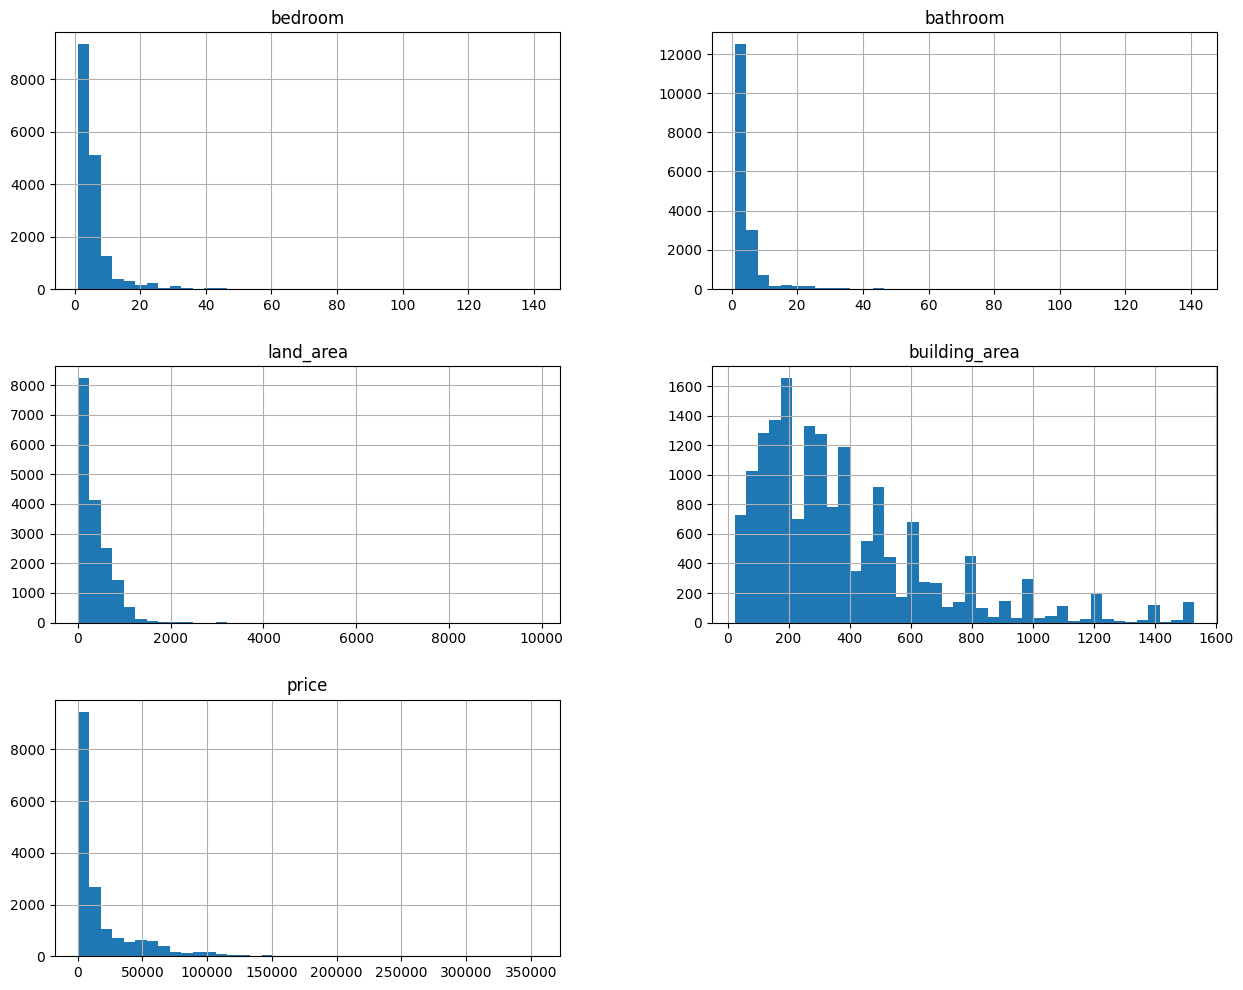

In [ ]:
df_eda.hist(bins=40, figsize=(15,12))
plt.show()

## Multivariate Analysis

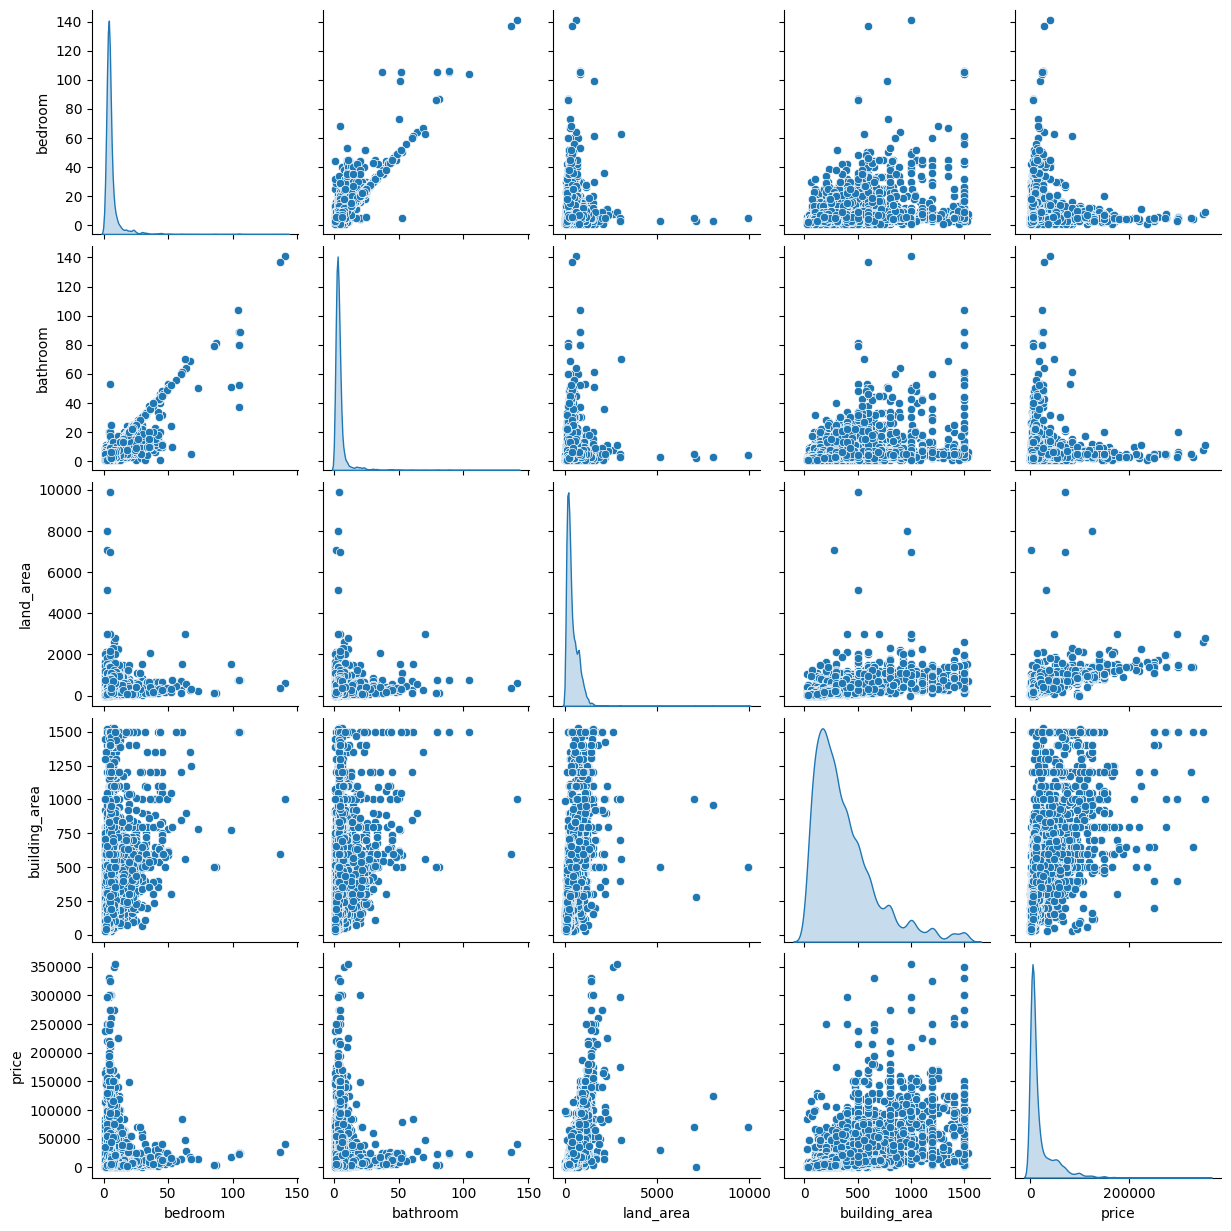

In [ ]:
sns.pairplot(df_eda, diag_kind = 'kde')

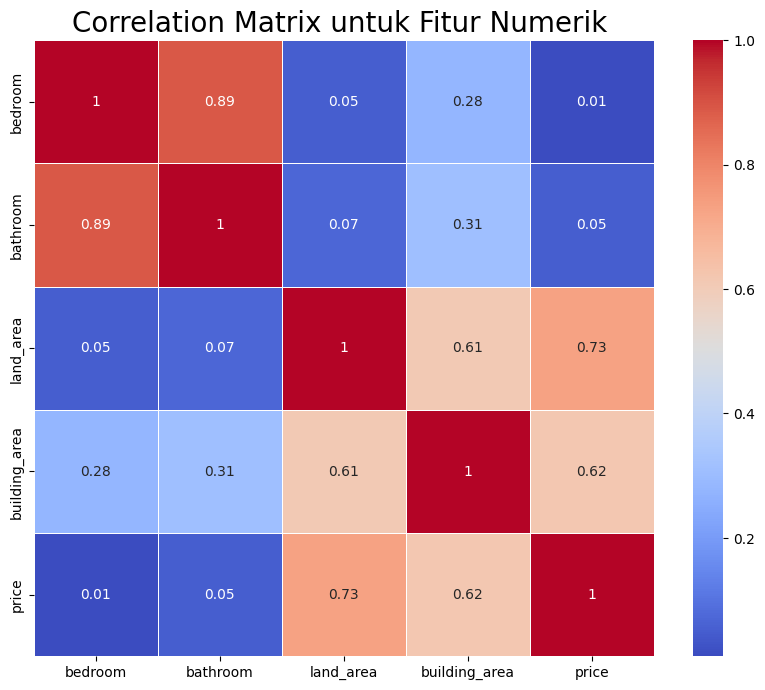

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_eda.corr(numeric_only=True).round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20);

# Data Preparation

### One Hot Encode Categorical Data

In [ ]:
df_all = pd.concat([df_all, pd.get_dummies(df_all['location'], prefix='loc')],axis=1)

In [ ]:
df_all.drop(['location'], axis=1, inplace=True)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17040 entries, 0 to 17600
Columns: 189 entries, bedroom to loc_Wahid Hasyim
dtypes: bool(184), float64(1), int32(4)
memory usage: 3.5 MB


### Data Splitting

In [ ]:
X = df_all.drop(["price"],axis =1)
y = df_all["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 17040
Total # of sample in train dataset: 14484
Total # of sample in test dataset: 2556


## Data Normalization

In [ ]:
numerical_features = df_all.select_dtypes(include='int32').columns.to_list()
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

In [ ]:
X_train[numerical_features].head()

,bedroom,bathroom,land_area,building_area
8728,-0.435521,-0.266052,-0.880179,-0.997940
5628,-0.283449,-0.090286,-0.702325,-0.960654
16080,-0.435521,-0.441817,-0.919702,-1.079291
5088,-0.435521,-0.266052,-0.400256,-0.435260
7020,0.172766,0.085480,-0.496240,-0.520001


In [ ]:
X_train[numerical_features].describe().round(4)

,bedroom,bathroom,land_area,building_area
count,14484.0000,14484.0000,14484.0000,14484.0000
mean,0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-0.7397,-0.6176,-1.0298,-1.2013
25%,-0.4355,-0.4418,-0.6487,-0.7234
50%,-0.2834,-0.2661,-0.3099,-0.2658
75%,0.0207,0.0855,0.4354,0.4121
max,20.5504,23.9896,26.9243,3.9035


# Model Developoment

## Linear Regression

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

## Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=50, n_jobs=-1, random_state=55)

## Support Vector Machine

In [ ]:
model_SVR = svm.SVR()
model_SVR.fit(X_train, y_train)

SVR()

# Model Evaluation

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
eval = pd.DataFrame(columns=['MAE', 'RMSE', 'R2', 'MAPE'], index=['LR', 'RF', 'SVM'])

model_dict = {'LR': model_LR, 'RF': RF, 'SVM': model_SVR}

for name, model in model_dict.items():
    eval.loc[name, 'MAE'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))
    eval.loc[name, 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)))
    eval.loc[name, 'R2'] = r2_score(y_true=y_test, y_pred=model.predict(X_test))
    eval.loc[name, 'MAPE'] = mean_absolute_percentage_error(y_true=y_test, y_pred=model.predict(X_test))

eval

,MAE,RMSE,R2,MAPE
LR,38849792074837.40625,491723306822612.875,-272698900517482987520.0,11402144212.207388
RF,3023.501012,7112.713466,0.942943,0.26905
SVM,15556.160407,31428.257515,-0.113993,1.251503


In [ ]:
prediksi = X_test.iloc[111:112].copy()
pred_dict = {'y_true':y_test[111:112]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pred = pd.DataFrame(pred_dict)

print(pred)

        y_true  prediksi_LR  prediksi_RF  prediksi_SVM
10846  36000.0      49120.0      40022.8        9849.8
